In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

    Задача регрессии

In [3]:
# Создаём обучающую выборку
ames_data = pd.read_csv('C:/Users/U_M1P8G/Desktop/IDE/Доп. главы высшей математики/Деревья решений/data/AmesHousing.csv')
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
X = ames_data[['Lot Frontage', 'Lot Area']]
y = ames_data['SalePrice']

In [4]:
# Инициализируем модель дерева решений с максимальной глубиной 3 и обучаем её
dt_reg = tree.DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X.values, y)

DecisionTreeRegressor(max_depth=3)

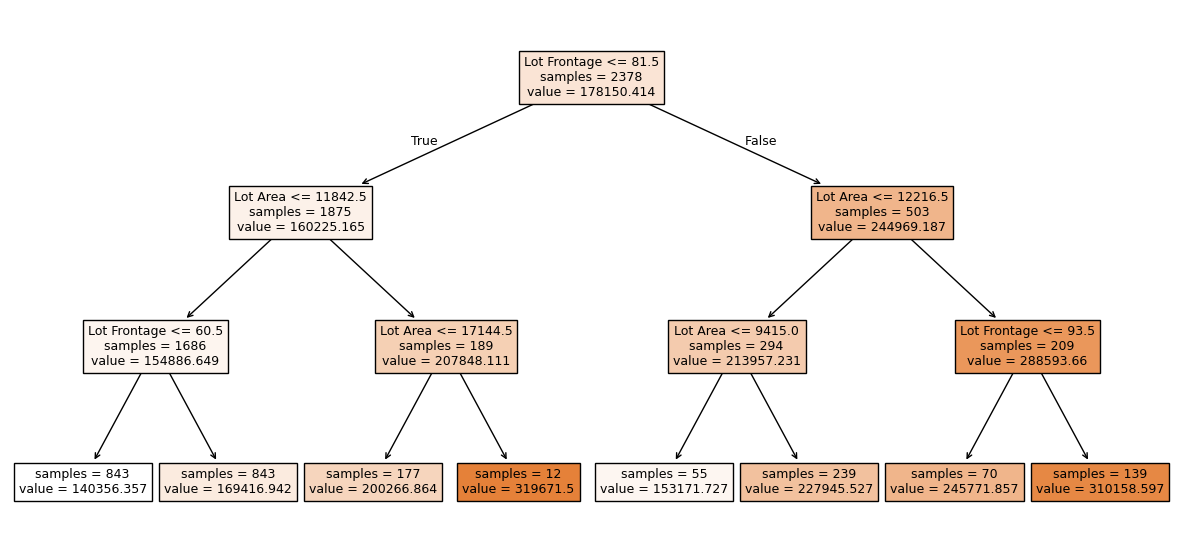

In [5]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_reg, #дерево решений 
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию plot_decision_bound_regression():

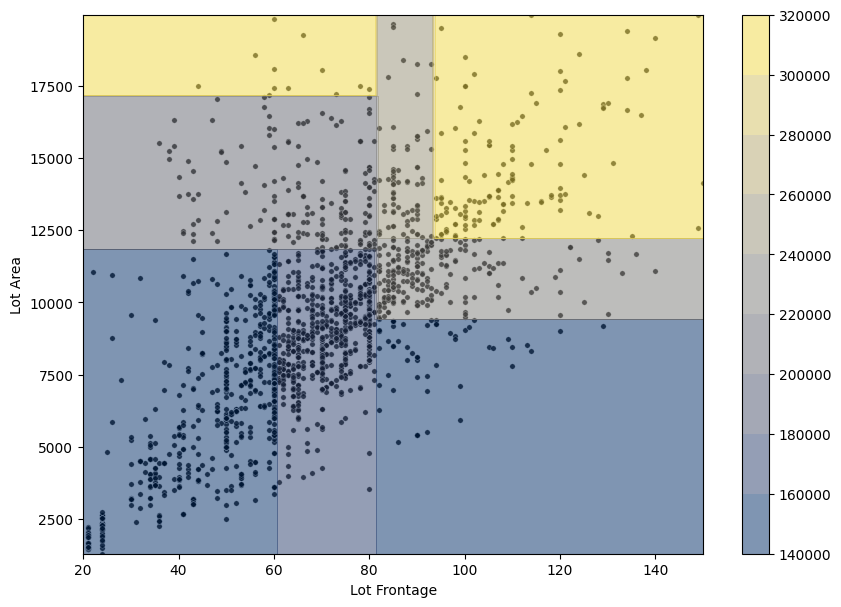

In [6]:
def plot_decision_bound_regression(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    y_pred = model.predict(X_net)
    y_pred = y_pred.reshape(xx1.shape)
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], s=15, color='black', alpha=0.8)
    contour = plt.contourf(xx1, xx2, y_pred, 10, cmap='cividis', alpha=0.5)
    fig.colorbar(contour)

# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_regression(X, y, dt_reg, fig)

    Задача классификации

In [7]:
# Создаём обучающую выборку    
bill_data = pd.read_csv('C:/Users/U_M1P8G/Desktop/IDE/Доп. главы высшей математики/Деревья решений/data/bill_authentication.csv')
X = bill_data[['Variance', 'Skewness']]
y = bill_data['Class']

Создадим модель дерева решений для задачи классификации (класс DecisionTreeClassifier из модуля tree библиотеки sklearn) с максимальной глубиной 4 и обучим её.

In [8]:
# Инициализируем модель дерева решений с максимальной глубиной 4 и обучаем её
dt_clf = tree.DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X.values, y)

DecisionTreeClassifier(max_depth=4)

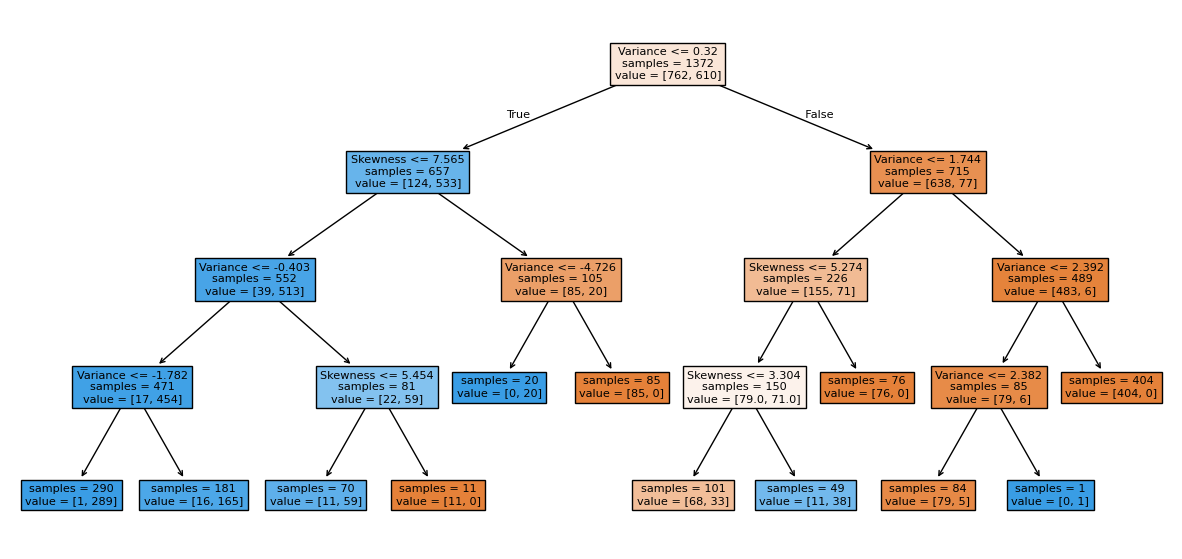

In [9]:
# Визуализируем дерево решений в виде графа
fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    dt_clf, #дерево решений
    feature_names=list(X.columns), #имена факторов
    filled=True, #расцветка
    impurity=False, #отображать ли неоднородность
);

Построим диаграмму рассеяния и визуализируем то, как дерево решений разделяет пространство факторов на прямоугольные области. Для этого шага мы реализовали функцию plot_decision_bound_classification():

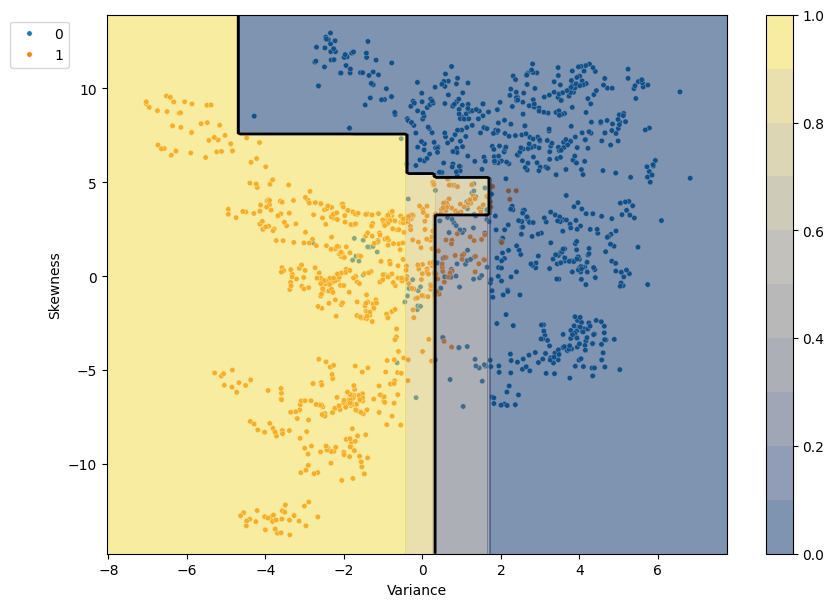

In [10]:
def plot_decision_bound_classification(X, y, model, fig):
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    probs = model.predict_proba(X_net)[:, 1]
    probs = probs.reshape(xx1.shape)
    
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, s=15, alpha=1)
    contour = plt.contourf(xx1, xx2, probs, 10, cmap='cividis', alpha=0.5)
    bound = plt.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    fig.colorbar(contour)
    plt.legend(bbox_to_anchor=(-0.05, 1))
# Визуализируем разделяющую поверхность дерева решений
fig = plt.figure(figsize = (10, 7))
plot_decision_bound_classification(X, y, dt_clf, fig)

Реализация на Python определения кандидатов в параметры предиката

In [11]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
x = data['age']
y = data['loan']

Сначала отсортируем фактор по возрастанию с помощью метода sort_values() и удалим из него дубликаты с помощью метода drop_duplicates():

In [12]:
x = x.sort_values().drop_duplicates()
print(x.values)
# [17 18 20 25 29 31 38 49 55 64]

[17 18 20 25 29 31 38 49 55 64]


Для вычисления скользящего среднего в Pandas можно воспользоваться комбинацией методов rolling() и mean(). В методе rolling() необходимо указать окно, в котором считается среднее (в нашем случае оно равно 2):

In [13]:
x_roll_mean = x.rolling(2).mean()
print(x_roll_mean.values)
# [ nan 17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]

[ nan 17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


В результате вычисления скользящего среднего всегда будет образовываться один пропуск. Для его исключения воспользуемся методом dropna():

In [14]:
x_roll_mean = x_roll_mean.dropna()
print(x_roll_mean.values)

[17.5 19.  22.5 27.  30.  34.5 43.5 52.  59.5]


Наконец, необходимо отфильтровать x так, чтобы в результат попали только те значения, при переходе через которые целевая переменная меняется. Для этого мы отсортируем y в соответствии с индексами x, затем вычислим разницу между соседними значениями y с помощью метода diff(). После этого произведём фильтрацию:

In [16]:
y = y[x_roll_mean.index]
y_roll_mean = y.diff()
candidates = x_roll_mean[y_roll_mean != 0]
print(candidates.values)

[17.5 19.  22.5 30.  34.5 43.5]


In [17]:
x_roll_mean.index

Index([2, 3, 7, 8, 9, 4, 5, 6, 1], dtype='int64')

Удобнее будет оформить полученный алгоритм в виде функции find_candidates_for_thresholds(). Она будет принимать на вход фактор x и целевую переменную y и возвращать кандидатов в пороговые значения для y в виде numpy-массива:

In [18]:
def find_candidates_for_thresholds(x, y):
    x = x.sort_values().drop_duplicates()
    x_roll_mean = x.rolling(2).mean().dropna()
    y = y[x_roll_mean.index]
    y_roll_mean = y.diff()
    candidates = x_roll_mean[y_roll_mean != 0]
    return candidates.values

In [19]:
print(find_candidates_for_thresholds(data['age'], data['loan']))
print(find_candidates_for_thresholds(data['income'], data['loan']))
# [17.5 19.  22.5 30.  34.5 43.5]
# [23.5 34.5 36.5 48.  64.5 72. ]

[17.5 19.  22.5 30.  34.5 43.5]
[23.5 34.5 36.5 48.  64.5 72. ]


Задание 3.4.

In [24]:
ames_data = ames_data[(ames_data['Lot Frontage'] <=150) & (ames_data['Lot Area'] <=20000)]
ames_sample = ames_data[['Lot Frontage', 'Lot Area', 'SalePrice']].sample(
    n=15, #количество объектов
    random_state=42, #генератор случайных чисел
    ignore_index=True #сбрасываем счетчик индекса
)

print(find_candidates_for_thresholds(ames_sample['Lot Frontage'], ames_sample['SalePrice']))

[ 53.  58.  61.  65.  69.  71.  76.  86.  94. 101.]


Задание 3.5.    

In [25]:
print(find_candidates_for_thresholds(ames_sample['Lot Area'], ames_sample['SalePrice']))

[ 5508.   7153.   7425.   7949.   8405.5  8526.5  8850.   9137.5  9466.
 10051.5 10507.  10834.  11365.  12288. ]


Реализуем формирование пня на примере другой задачи

Для начала создадим функцию для расчёта среднего квадрата ошибки — squared_error(). Она будет принимать на вход истинные ответы и возвращать значение MSE, рассчитанное для входных данных.

In [26]:
def squared_error(y):
    y_pred = y.mean()
    return ((y - y_pred) ** 2).mean()

Далее нам необходимо реализовать функцию split(), которая разбивает выборку  по предикату  с параметрами разделения (split_params) на левую и правую части:

In [33]:
def split(X, y, split_params):
    j, t = split_params
    predicat = X.iloc[:, j] <= t
    X_left, y_left = X[predicat], y[predicat]
    X_right, y_right = X[~predicat], y[~predicat]
    return X_left, y_left, X_right, y_right

Затем создадим функцию calculate_weighted_impurity(). Она будет принимать на вход выборку — X и y, параметры разбиения — split_params, а также criterion — функцию, по которой рассчитывается критерий информативности (у нас это функция squared_error()). Результатом работы функции будет взвешенная неоднородность после разбиения.

In [32]:
def calculate_weighted_impurity(X, y, split_params, criterion):
    X_left, y_left, X_right, y_right = split(X, y, split_params)
    N, N_left, N_right  = y.size, y_left.size, y_right.size
    score = N_left / N * criterion(y_left) + N_right / N * criterion(y_right)
    return score

Наконец, финальный шаг — построить решающий пень. Для этого необходимо оформить в виде цикла отбор кандидатов в параметры разбиения и найти оптимальные из них. За данный шаг будет отвечать функция best_split(). Она будет принимать на вход выборку (X и y) и возвращать оптимальные параметры разбиения, при которых значение взвешенной неоднородности минимально, а также значение этой неоднородности.

In [29]:
def best_split(X, y, criterion):
    M = X.shape[1]
    min_weighted_impurity = np.inf
    optimal_split_params = None
    for j in range(M):
        thresholds = find_candidates_for_thresholds(X.iloc[:, j], y)
        for t in thresholds:
            split_params = (j, t)
            weighted_impurity = calculate_weighted_impurity(X, y, split_params, criterion)
            if weighted_impurity < min_weighted_impurity:
                min_weighted_impurity = weighted_impurity
                optimal_split_params = split_params
    return optimal_split_params

In [34]:
data = pd.DataFrame({
    'x1': list(range(1, 16)),
    'y': [1, 1.2, 1.4, 1.1, 1, 5.5, 6.1, 6.7, 6.4, 6, 6, 3, 3.2, 3.1, 3]
})
X = data[['x1']]
y = data['y']

# Находим оптимальные параметры разбиения
optimal_split_params = best_split(X, y, criterion=squared_error)
print('Optimal j: {}'.format(optimal_split_params[0]))
print('Optimal t: {}'.format(optimal_split_params[1]))

# Optimal j: 0
# Optimal t: 5.5

Optimal j: 0
Optimal t: 5.5


Если мы обучим на наших данных решающий пень из библиотеки sklearn с критерием информативности 'squared_error'  и параметром random_state = 0, а затем визуализируем его в виде графа, то получим ровно тот же результат:

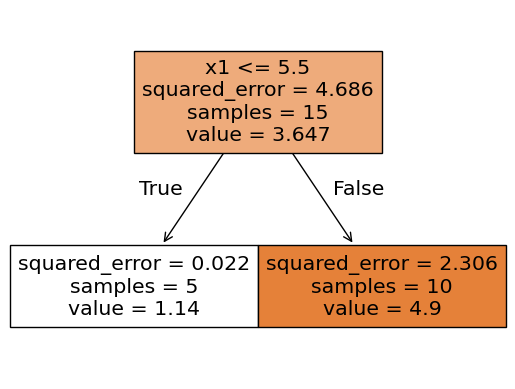

Задание 4.3.

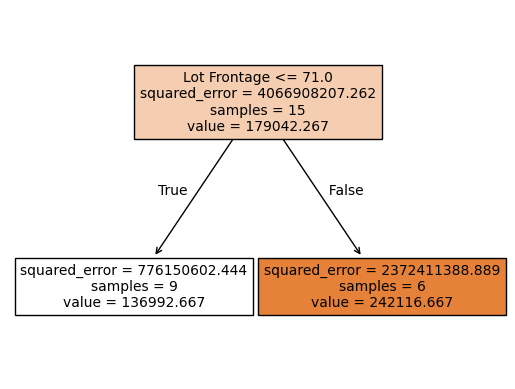

In [36]:
ames_data = ames_data[(ames_data["Lot Frontage"] <=150) & (ames_data["Lot Area"] <=20000)]

ames_sample = ames_data[["Lot Frontage", "Lot Area", "SalePrice"]].sample(
    n=15, random_state=42, ignore_index=True
)

X = ames_sample[["Lot Frontage", "Lot Area"]]
y = ames_sample["SalePrice"]

# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем её
dt = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=0 #генератор случайных чисел
)

dt.fit(X, y)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=list(X.columns), #названия факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

Задание 4.5.

In [49]:
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

In [55]:
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

optimal_params = best_split(X, y, criterion=entropy)
print('Optimal j: {}'.format(optimal_params[0]))
print('Optimal t: {}'.format(optimal_params[1]))

column_index = optimal_params[0]
column_name = X.columns[column_index]

left_mask = X[column_name] <= optimal_params[1]
y_left = y[left_mask]  # Используем простую индексацию без .loc
y_right = y[~left_mask]

print('Left entropy: {:.3f}'.format(entropy(y_left)))
print('Right entropy: {:.3f}'.format(entropy(y_right)))

weighted_entropy = (len(y_left) * entropy(y_left) + len(y_right) * entropy(y_right)) / len(y)
print('Weighted entropy: {:.3f}'.format(weighted_entropy))

Optimal j: 1
Optimal t: 3.22085
Left entropy: 0.985
Right entropy: -0.000
Weighted entropy: 0.460


Реализуем алгоритм

Для начала создадим вспомогательный класс вершины. У него будут следующие атрибуты:

left — ссылка на левого потомка;
right — ссылка на правого потомка;
value — ответ алгоритма;
split_params — параметры разбиения (сплита);
impurity — неоднородность в вершине (пригодится для расчёта важности признаков);
samples — количество объектов, попавших в вершину;
is_leaf — булева переменная, которая указывает, является ли вершина листовой.

In [56]:
class Node:
    def __init__(self, left=None, 
                 right=None, value=None, 
                 split_params=None, impurity=None,
                 samples=None, is_leaf=False):
        self.left = left
        self.right = right
        self.split_params = split_params
        self.value = value
        self.impurity = impurity
        self.samples = samples
        self.is_leaf = is_leaf

In [57]:
def create_leaf_prediction(y):
    value = y.mode()[0]
    return value

Далее введём критерий остановки. Самый базовый критерий — равенство нулю критерия информативности, рассчитанного по вершине.

In [58]:
def stopping_criterion(X, y, criterion):
    return criterion(y) == 0

Наконец, создадим функцию build_decision_tree(). Она будет реализовывать сам рекурсивный алгоритм построения дерева решений. Функция будет принимать на вход выборку X и y, а также критерий информативности. На выходе функции должна быть корневая вершина дерева (объект класса Node). Она будет ссылаться на своих левого и правого потомка, они в свою очередь будут ссылаться на своих потоков, и так далее до самых листьев.

In [59]:
def build_decision_tree(X, y, criterion):
    if stopping_criterion(X, y, criterion):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=criterion)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion)
        right = build_decision_tree(X_right, y_right, criterion)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    
    return node

Также напишем вспомогательную функцию print_decision_tree(). Она будет принимать на вход корневую вершину дерева решений и рекурсивно выводить дерево решений в виде текста:

In [60]:
def print_decision_tree(node, depth=0):
    depth += 1
    if node.is_leaf:
        print('   ' * depth, 'class: {}'.format(node.value))
    else:
        print('   ' * depth, 'feature_{} <= {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.left, depth=depth)
        print('   ' * depth, 'feature_{} > {:.3f}:'.format(*node.split_params))
        print_decision_tree(node.right, depth=depth)

Давайте обучим наше дерево решений на игрушечном датасете о выдаче кредитов клиентам банка и напечатаем его. Напомним, что у нас есть два фактора:  — возраст заёмщика,  — доход заёмщика. Целевая переменная  — бинарная (0 — кредит погашен, 1 — кредит не погашен).

In [61]:
# Объявляем функцию для вычисления энтропии
def entropy(y):
    p = y.value_counts(normalize=True)
    entropy = -np.sum(p * np.log2(p))
    return entropy

# Создаём обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan']

# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          feature_0 <= 22.500:
             feature_0 <= 19.000:
                class: 1
             feature_0 > 19.000:
                class: 0
          feature_0 > 22.500:
             class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


Давайте сравним наш результат с деревом решений из sklearn, напечатав его в текстовом виде с помощью функции export_text() из модуля tree. Не будем ограничивать глубину дерева, а в качестве значения параметра random_state возьмём 1000 для совпадения результатов:

In [62]:
# Создаём модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))

|--- feature_0 <= 43.50
|   |--- feature_1 <= 86.00
|   |   |--- feature_0 <= 22.50
|   |   |   |--- feature_0 <= 19.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  19.00
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  22.50
|   |   |   |--- class: 1
|   |--- feature_1 >  86.00
|   |   |--- class: 0
|--- feature_0 >  43.50
|   |--- class: 0



Как вы понимаете, построить дерево решений мало — нужно ещё научить его предсказывать целевую переменную для новых объектов. Для этого реализуем две функции:

predict_sample() принимает на вход вершину и один объект из выборки x. Алгоритм предсказания следующий: нужно рекурсивно передвигаться по дереву на основе характеристик объекта (если  — в левую вершину, иначе — в правую), а когда дойдём до листовой вершины, вернуть предсказание, которое присвоено этому листу (value).

In [63]:
def predict_sample(node, x):
    if node.is_leaf:
        return node.value
    j, t = node.split_params
    if x[j] <= t:
        return predict_sample(node.left, x)
    else:
        return predict_sample(node.right, x)

predict() принимает на вход дерево решений и матрицу из объектов X, для которых нужно сделать предсказание. Внутри себя функция должна сделать предсказание для всех объектов из X — вызвать функцию predict_sample(). Результат оборачивается в список, а затем в numpy-вектор.

In [65]:
def predict(decision_tree, X):
    predictions = [predict_sample(decision_tree, x) for x in X.values]
    return np.array(predictions)

In [66]:
# Предсказываем целевую переменную
y_pred = predict(decision_tree, X)
print('Predictions: {}'.format(y_pred))
# Predictions: [1 0 1 0 1 0 0 1 1 0]

Predictions: [1 0 1 0 1 0 0 1 1 0]


Задание 5.3.

In [70]:
bill_sample = bill_data[['Variance', 'Skewness', 'Class']].sample(
    n=15, 
    random_state=42, 
    ignore_index=True
)
# Создаём обучающую выборку
X = bill_sample[['Variance', 'Skewness']]
y = bill_sample['Class']

decision_tree = build_decision_tree(X, y, criterion=entropy)
print_decision_tree(decision_tree)

    feature_1 <= 3.221:
       feature_0 <= 2.756:
          feature_0 <= -1.254:
             class: 0
          feature_0 > -1.254:
             feature_0 <= -0.063:
                class: 1
             feature_0 > -0.063:
                feature_0 <= 0.988:
                   class: 0
                feature_0 > 0.988:
                   class: 1
       feature_0 > 2.756:
          class: 0
    feature_1 > 3.221:
       class: 0


In [71]:
# Создаём модель дерева решений
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X, y)
# Выводим дерево решений на экран в виде списка условий
print(tree.export_text(decision_tree=dt))

|--- feature_1 <= 3.22
|   |--- feature_0 <= 2.76
|   |   |--- feature_0 <= -1.25
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.25
|   |   |   |--- feature_0 <= -0.06
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.06
|   |   |   |   |--- feature_0 <= 0.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  0.99
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  2.76
|   |   |--- class: 0
|--- feature_1 >  3.22
|   |--- class: 0



В реализации дерева решений в sklearn предусмотрено несколько критериев, при выполнении одного из которых ветвление дерева прекращается. Мы рассмотрим основные из них на примере нашего «игрушечного» датасета о выплатах кредита.

In [72]:
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'y': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
# Создаём обучающую выборку
X = data[['age', 'income']]
y = data['y']

1. Достижение однородности

Для примера построим дерево решений, используя наш «игрушечный» датасет. При этом все параметры оставим по умолчанию. Получим следующее дерево:

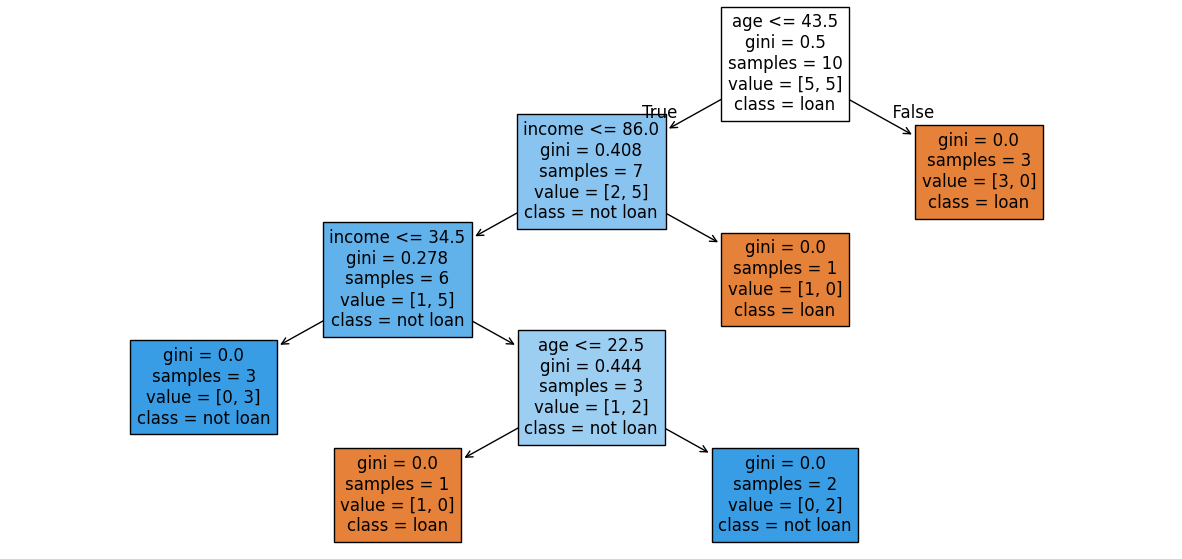

In [73]:
dt = tree.DecisionTreeClassifier(random_state=42)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

2. Ограничение максимальной глубины дерева (параметр max_depth)

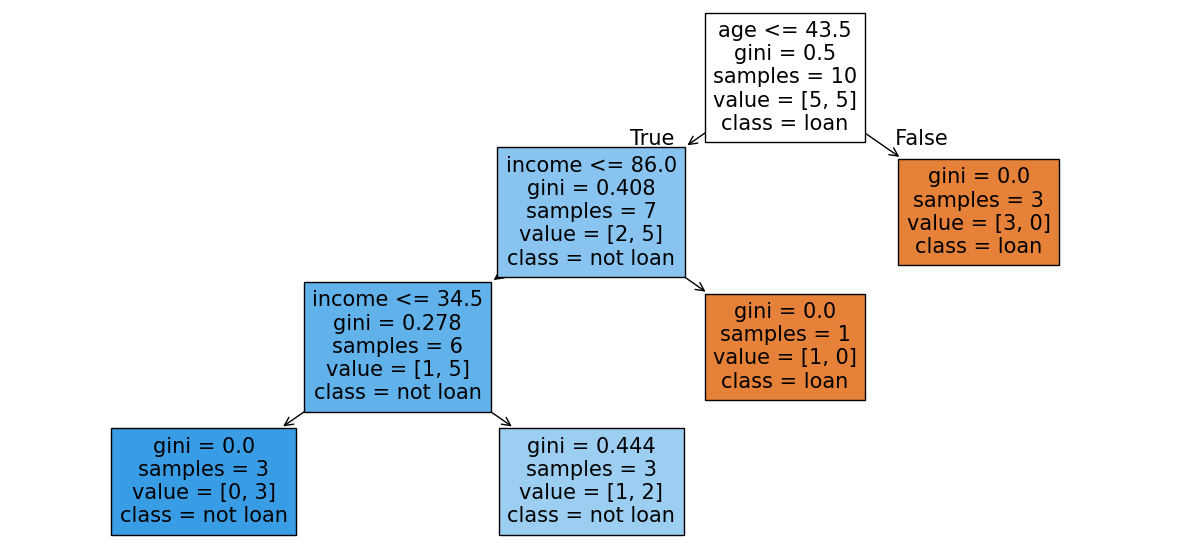

In [74]:
dt = tree.DecisionTreeClassifier(
    max_depth=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

3. Ограничение максимального количества листьев в дереве (параметр max_leaf_node)

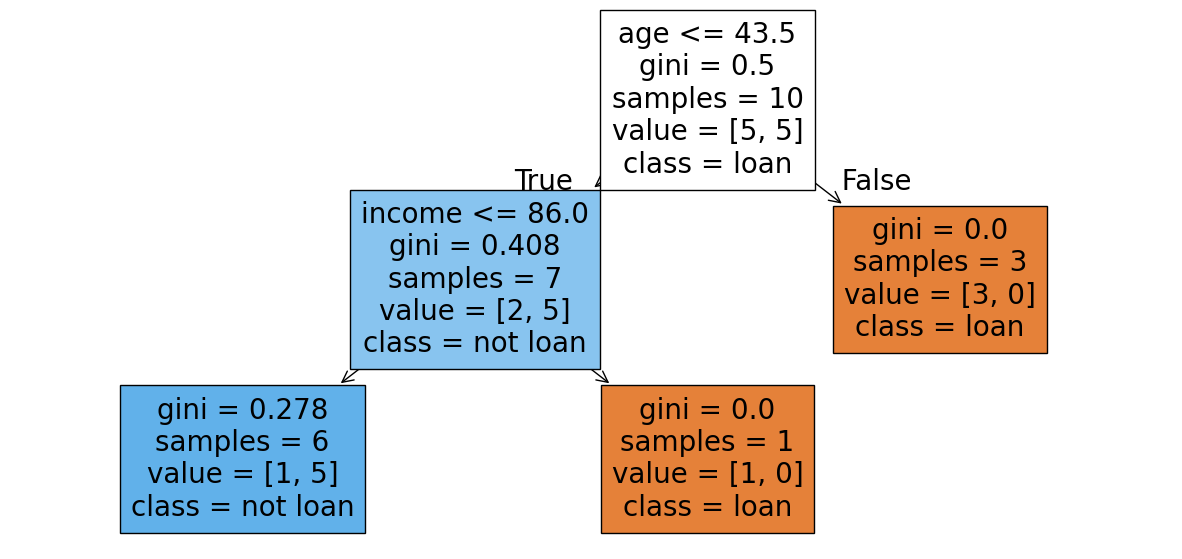

In [75]:
dt = tree.DecisionTreeClassifier(
    max_leaf_nodes=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

4. Ограничение на минимальное количество объектов, при которых допускается ветвление дерева (параметр min_samples_split)

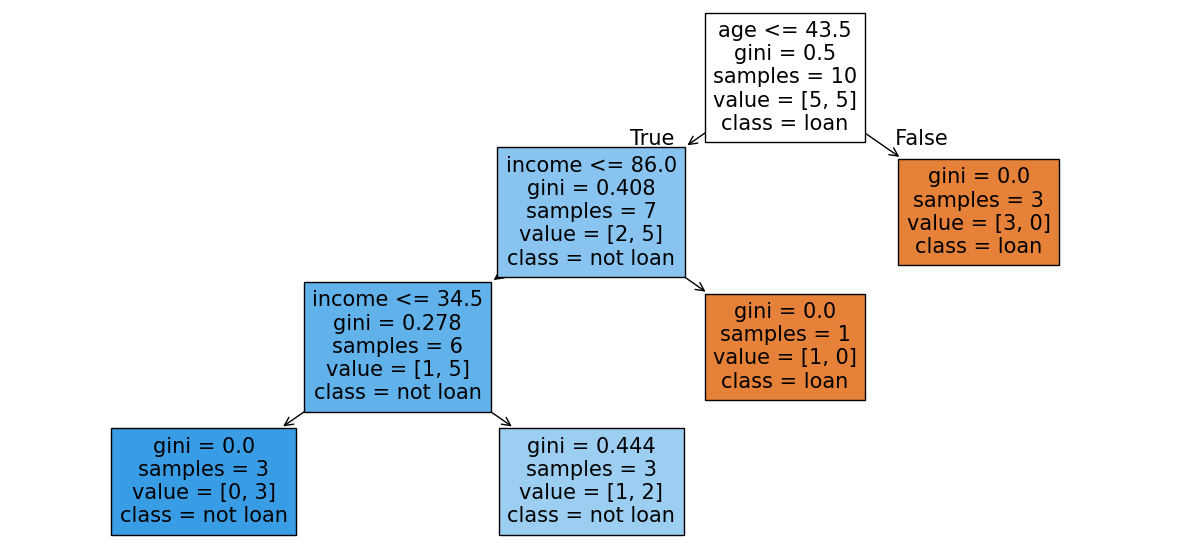

In [76]:
dt = tree.DecisionTreeClassifier(
    min_samples_split=6, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

5. Ограничение на минимальное количество объектов, необходимых для создания листа (параметр min_samples_leaf)

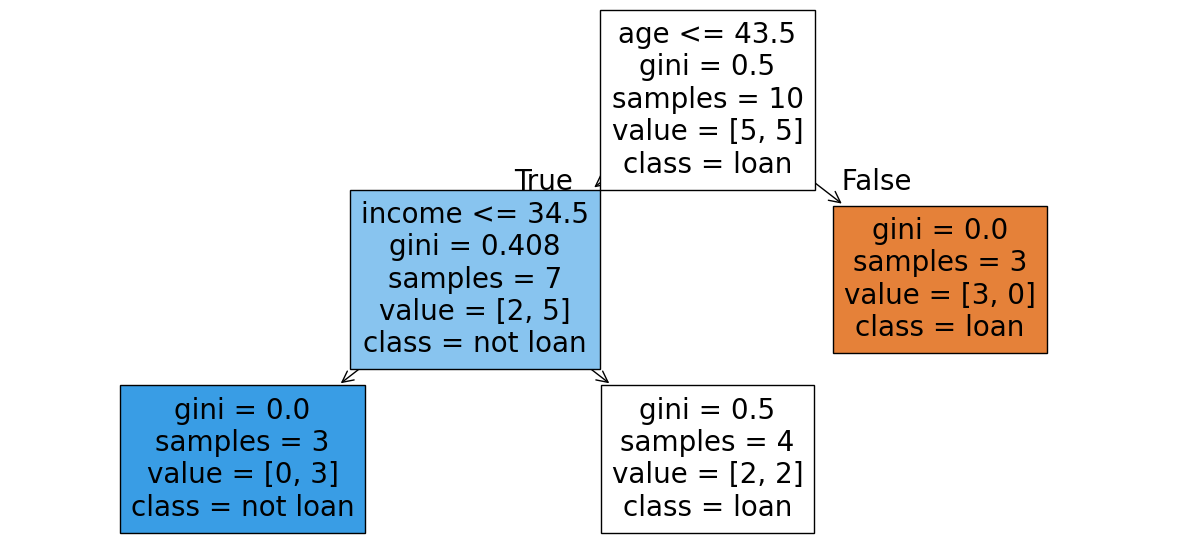

In [77]:
dt = tree.DecisionTreeClassifier(
    min_samples_leaf=3, 
    random_state=42
)
dt.fit(X, y)


fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['loan', 'not loan'], 
    filled=True, 
    impurity=True
);

Давайте адаптируем наш метод построения дерева решений и введём новое ограничение на максимальную глубину дерева: в функции stop_criterion() и build_decision_tree() добавим параметр max_depth, а также счётчик глубины рекурсии depth:

In [79]:
def stopping_criterion(X, y, criterion, max_depth=None, depth=0):
    if max_depth is None:
        return (criterion(y) == 0) 
    else:
        return (criterion(y) == 0) or (depth > max_depth)
    
def build_decision_tree(X, y, criterion, max_depth=None, depth=0):
    depth += 1
    if stopping_criterion(X, y, criterion, max_depth, depth):
        value = create_leaf_prediction(y)
        node = Node(
            value=value, 
            impurity=criterion(y), 
            samples=y.size,
            is_leaf=True
        )
    else:
        split_params = best_split(X, y, criterion=entropy)
        X_left, y_left, X_right, y_right = split(X, y, split_params)
        left = build_decision_tree(X_left, y_left, criterion, max_depth, depth)
        right = build_decision_tree(X_right, y_right, criterion, max_depth, depth)       
        node = Node(
            left=left, right=right, 
            split_params=split_params, 
            impurity=criterion(y), 
            samples=y.size
        )
    return node

In [80]:
# Строим дерево решений с ограничением глубины и выводим его на экран
decision_tree = build_decision_tree(X, y, criterion=entropy, max_depth=2)
print_decision_tree(decision_tree)

    feature_0 <= 43.500:
       feature_1 <= 86.000:
          class: 1
       feature_1 > 86.000:
          class: 0
    feature_0 > 43.500:
       class: 0


Значимость признаков

Реализуем функцию calculate_feature_importances() для расчёта относительных значимостей признаков. Она будет принимать на вход обученное дерево решений. Также у неё будет аргумент по умолчанию — массив из значимостей feature_importances. Так как функция будет рекурсивной, то при первом запуске массив нужно проинициализировать нулями.

In [81]:
def calculate_feature_importances(node, feature_importance=None):
    if feature_importance is None:
        feature_importance = np.zeros(X.shape[1])
    if node.value is None:
        j = node.split_params[0]
        feature_importance[j] += node.impurity * node.samples - \
                                 node.left.impurity * node.left.samples - \
                                 node.right.impurity * node.right.samples
        calculate_feature_importances(node.left, feature_importance)
        calculate_feature_importances(node.right, feature_importance)
    feature_importance /= node.samples
    feature_importance /= feature_importance.sum()
    return feature_importance

In [84]:
# Создаём обучающую выборку
data = pd.DataFrame({
    'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31],
    'income': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102],
    'loan': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
})
X = data[['age', 'income']]
y = data['loan'] 
# Строим дерево решений и выводим его на экран
decision_tree = build_decision_tree(X, y, entropy)
print(calculate_feature_importances(decision_tree))

[0.78582905 0.21417095]


В sklearn:

In [85]:
# Создаём модель дерева решений и обучаем её
dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000 #генератор случайных чисел
)
dt.fit(X, y)
# Вычисляем значения информативности признаков
print(dt.feature_importances_)
# [0.78582905 0.21417095]

[0.78582905 0.21417095]


Юнит 7. Практика

In [87]:
from sklearn import model_selection
from sklearn import metrics

voice_data = pd.read_csv('C:/Users/U_M1P8G/Desktop/IDE/Доп. главы высшей математики/Деревья решений/data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [88]:
voice_data.isnull().sum().sum()

np.int64(0)

Разделим датасет на две части в соотношении 80/20:

In [98]:
voice_data['label'].value_counts()

label
male      1584
female    1584
Name: count, dtype: int64

Задание 7.1.

Train shape: (2534, 20)
Test shape: (634, 20)


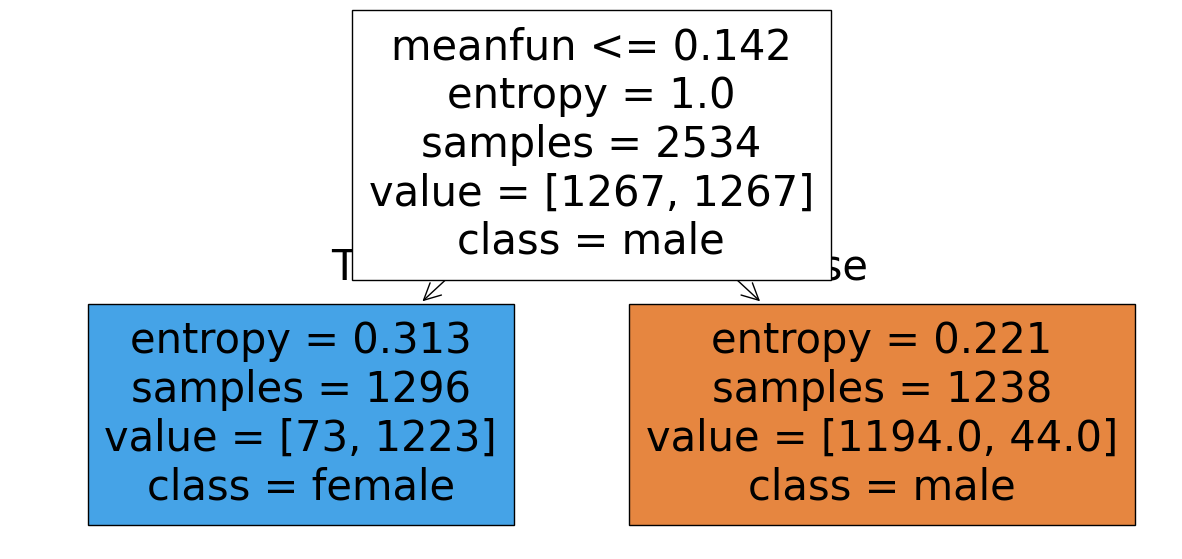

In [99]:
X = voice_data.iloc[:, :-1]
y = voice_data['label']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

dt = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000, 
    max_depth=1
)
dt.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt, 
    feature_names=X.columns, 
    class_names=['male', 'female'], 
    filled=True, 
    impurity=True
);

In [105]:
y_pred = dt.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9558359621451105

Задание 7.2.

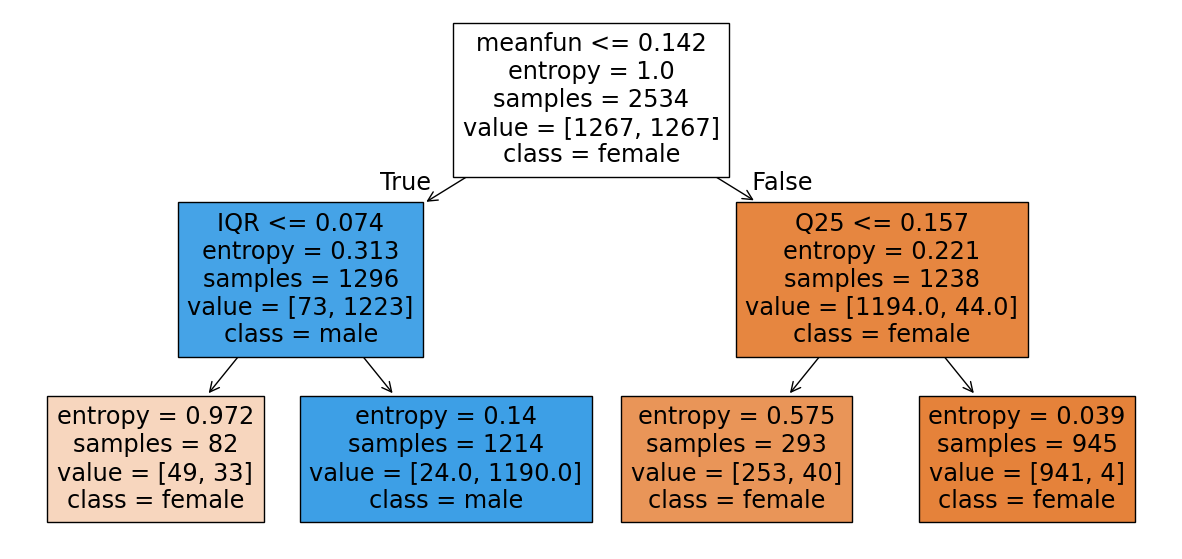

In [107]:
dt_2 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=1000, 
    max_depth=2
)
dt_2.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 7))
tree_graph = tree.plot_tree(
    decision_tree=dt_2, 
    feature_names=X.columns, 
    class_names=dt_2.classes_, 
    filled=True, 
    impurity=True
);

In [108]:
y_pred = dt_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9621451104100947

In [109]:
dt_3 = tree.DecisionTreeClassifier(
    criterion='entropy', #критерий информативности
    random_state=0
)
dt_3.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [111]:
dt_3.get_depth()
dt_3.get_n_leaves()

np.int64(54)

In [112]:
y_pred_test = dt_3.predict(X_test)
y_pred_train = dt_3.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(accuracy_test, accuracy_train)

0.973186119873817 1.0


Задание 7.4.

In [114]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [116]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

# Создаем GridSearchCV
grid_search = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=0),  # модель с random_state=0
    param_grid=param_grid,                                   # сетка параметров
    cv=cv,                                                  # стратегия кросс-валидации
    scoring='accuracy',                                      # метрика качества
    n_jobs=-1,                                              # использовать все ядра процессора
    verbose=1                                               # вывод прогресса
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy', verbose=1)

In [117]:
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая accuracy на кросс-валидации: {:.3f}".format(grid_search.best_score_))

Лучшие параметры: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}
Лучшая accuracy на кросс-валидации: 0.966


In [120]:
dt_4 = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности
    random_state=0,
    max_depth= 7,
    min_samples_split = 3
)
dt_4.fit(X_train, y_train)

y_pred_test = dt_4.predict(X_test)
y_pred_train = dt_4.predict(X_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

print(accuracy_test, accuracy_train)

0.9700315457413249 0.9956590370955012


Задание 7.5.

In [121]:
print(dt_4.feature_importances_)

[0.00257071 0.00412021 0.00324731 0.00143184 0.00361359 0.05681024
 0.00419621 0.00654448 0.00091911 0.01800429 0.0060468  0.00598505
 0.86134736 0.01415259 0.         0.00119966 0.00153412 0.
 0.00688824 0.0013882 ]


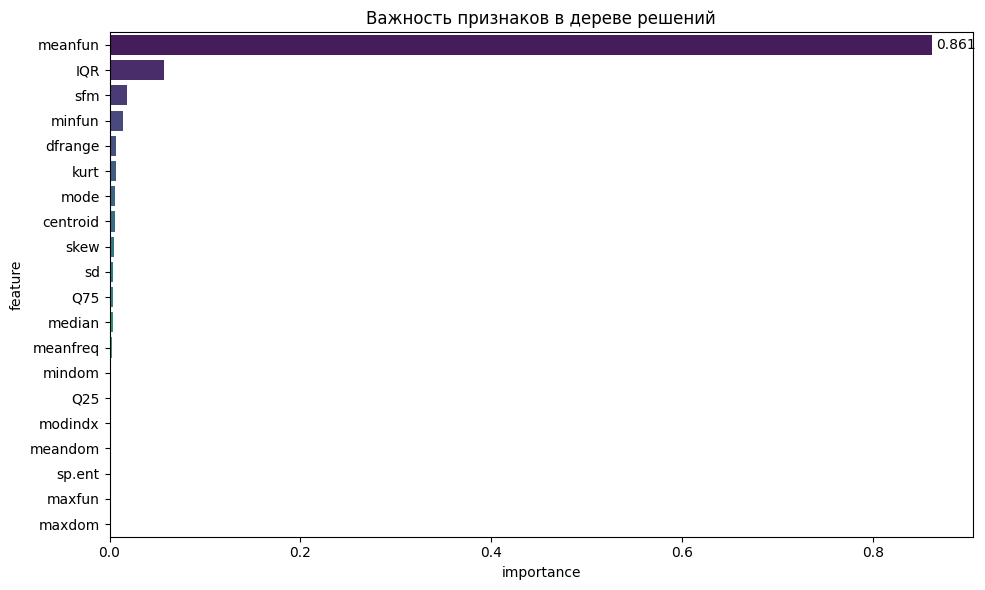

In [128]:
import seaborn as sns
import pandas as pd

feature_importances = dt_4.feature_importances_
feature_names = X_train.columns

# Создаем DataFrame для удобства
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=importance_df, x='importance', y='feature', hue='feature'
                 , palette='viridis', legend=False)

# ВСЁ ЗАМЕНЯЕТ ЦИКЛ - одна строка!
ax.bar_label(ax.containers[0], fmt='%.3f', padding=3)

plt.title('Важность признаков в дереве решений')
plt.tight_layout()
plt.show()

